## Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

#import sqlite3    
#import pickle    
import time

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn import svm
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, learning_curve, cross_val_score
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

from xgboost.sklearn import XGBClassifier
import xgboost as xgb

from IPython.display import Image 
from pydot import graph_from_dot_data
#import imblearn
#from imblearn.over_sampling import SMOTE 

import scikitplot as skplt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers
#from keras.optimizers import RMSprop

import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

import warnings
warnings.filterwarnings('ignore')

C:\Users\gogul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#from numpy.random import seed
#seed(100)
import tensorflow
tensorflow.random.set_seed(200)

## Read Data

In [2]:
df = pd.read_csv("sgemm_product.csv")
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run1 (ms)', 'Run2 (ms)',
       'Run3 (ms)', 'Run4 (ms)'],
      dtype='object')

## Exploratory Data Analysis

In [297]:
#Correlation Matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [298]:
pd.crosstab(df.VWM, df.MWG)

MWG  16.0   32.0   64.0   128.0
VWM                            
1.0  14848  28320  28320  28320
2.0   4096  14848  28320  28320
4.0      0   4096  14848  28320
8.0      0      0   4096  14848

In [299]:
pd.crosstab(df.VWN, df.NWG)

NWG  16.0   32.0   64.0   128.0
VWN                            
1.0  14848  28320  28320  28320
2.0   4096  14848  28320  28320
4.0      0   4096  14848  28320
8.0      0      0   4096  14848

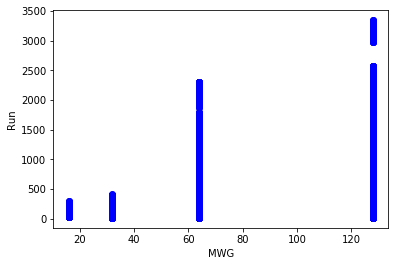

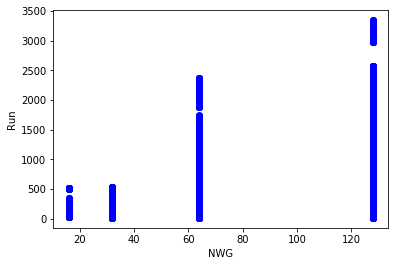

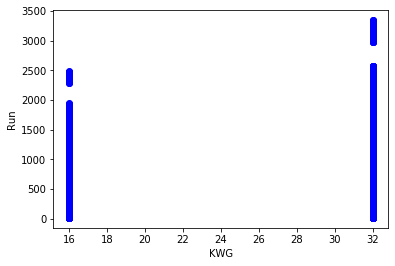

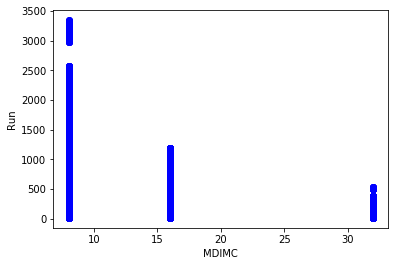

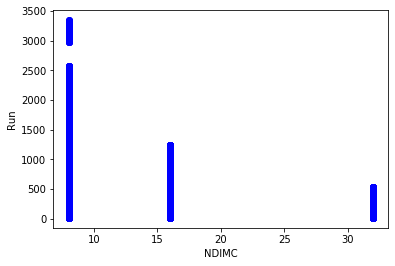

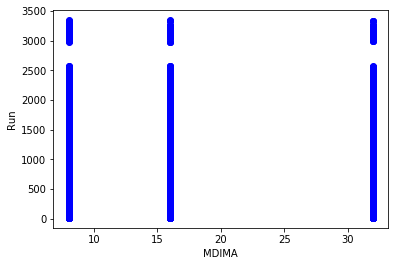

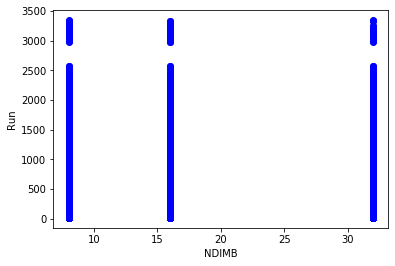

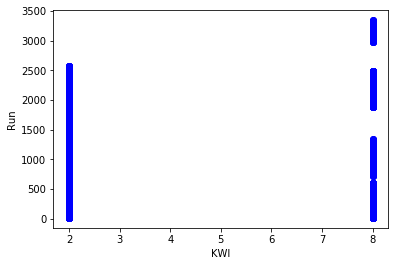

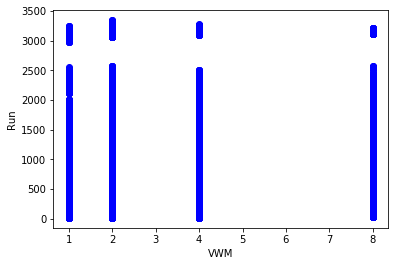

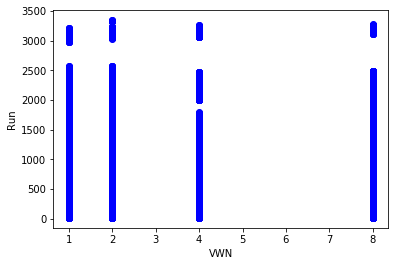

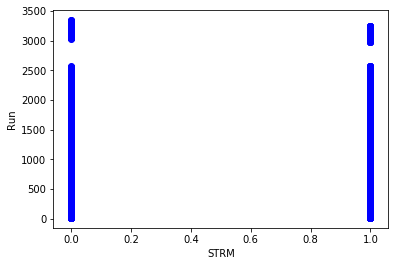

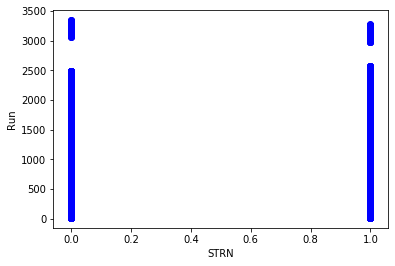

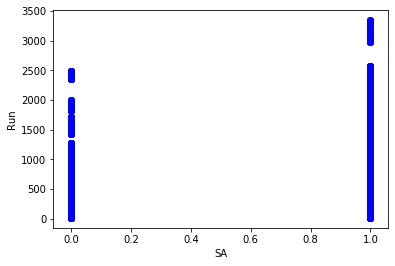

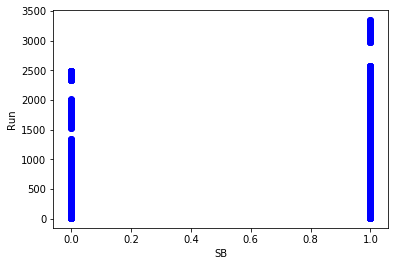

In [296]:
for i in range (0,df.shape[1]-1):
    plt.scatter(df.iloc[:,i], df['Run'], color = 'Blue')
    plt.ylabel('Run')
    plt.xlabel(str(df.columns[i]))
    #plt.legend()
    plt.show()

In [3]:
df=df.astype(float)
df.dtypes

MWG          float64
NWG          float64
KWG          float64
MDIMC        float64
NDIMC        float64
MDIMA        float64
NDIMB        float64
KWI          float64
VWM          float64
VWN          float64
STRM         float64
STRN         float64
SA           float64
SB           float64
Run1 (ms)    float64
Run2 (ms)    float64
Run3 (ms)    float64
Run4 (ms)    float64
dtype: object

## Set the output column for average

In [4]:
df['Run'] = (df['Run1 (ms)'] + df['Run2 (ms)'] + df['Run3 (ms)'] + df['Run4 (ms)'])/4
df
df = df.drop(['Run1 (ms)', 'Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)'], axis = 1)

In [5]:
# Scaling using min max scaler
for i in range(0,df.shape[1]):
    df.iloc[:,i]=(df.iloc[:,i]-df.iloc[:,i].min())/(df.iloc[:,i].max()-df.iloc[:,i].min())
df

MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI       VWM       VWN  \
0       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
1       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
2       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
3       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
4       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
5       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
6       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
7       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
8       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
9       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
10      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
11      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
12      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
13      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
14      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
15      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
16      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
17      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
18      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
19      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
20      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
21      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
22      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
23      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
24      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
25      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
26      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
27      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
28      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
29      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
...     ...  ...  ...    ...    ...    ...    ...  ...       ...       ...   
241570  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241571  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241572  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241573  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241574  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241575  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241576  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241577  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241578  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241579  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241580  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241581  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241582  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241583  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241584  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241585  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241586  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241587  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241588  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241589  1.0  1.0  1.0    1.0  

In [6]:
#Adding a column with values above 25 percentile coded as 0. This will be the predicted y variable.
#This is because lower the speed, the processer performs better
df['LogY'] = df['Run'].apply(lambda x:0 if x>0.064621 else 1)
df

MWG  NWG  KWG  MDIMC  NDIMC  MDIMA  NDIMB  KWI       VWM       VWN  \
0       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
1       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
2       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
3       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
4       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
5       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
6       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
7       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
8       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
9       0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
10      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
11      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
12      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
13      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
14      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
15      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.000000   
16      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
17      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
18      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
19      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
20      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
21      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
22      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
23      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
24      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
25      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
26      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
27      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
28      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
29      0.0  0.0  0.0    0.0    0.0    0.0    0.0  0.0  0.000000  0.142857   
...     ...  ...  ...    ...    ...    ...    ...  ...       ...       ...   
241570  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241571  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241572  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241573  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241574  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241575  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241576  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241577  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241578  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241579  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241580  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241581  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241582  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241583  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.142857   
241584  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241585  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241586  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241587  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241588  1.0  1.0  1.0    1.0    1.0    1.0    1.0  1.0  0.428571  0.428571   
241589  1.0  1.0  1.0    1.0  

In [7]:
print("Value counts for each term: \n",df['LogY'].value_counts())

Value counts for each term: 
 1    181200
0     60400
Name: LogY, dtype: int64


In [8]:
# dividing the data for various features
feature_vars = ['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB']
feature = df[['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB']]
#feature = df[['MWG','NWG']]
target = df['LogY']

In [9]:
x1_train, x1_test, y1_train, y1_test = train_test_split(feature, target, test_size = 0.2, random_state = 0)
x1_train = x1_train.values
x1_test = x1_test.values
y1_train = y1_train.values

In [10]:
y1_train.shape

(193280,)

In [11]:
np.unique(y1_train)

array([0, 1], dtype=int64)

# Support Vector Machine

In [55]:
# SVM on GPU data - Linear Kernel
svclassifier = SVC(kernel='linear')
svclassifier.fit(x1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_pred = svclassifier.predict(x1_test)

In [58]:
#Accuracy of Linear SVM
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.9340645695364238


In [59]:
print(confusion_matrix(y1_test,y_pred))
print(classification_report(y1_test,y_pred))

[[ 9828  2070]
 [ 1116 35306]]
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     11898
           1       0.94      0.97      0.96     36422

    accuracy                           0.93     48320
   macro avg       0.92      0.90      0.91     48320
weighted avg       0.93      0.93      0.93     48320



In [16]:
# SVM on GPU data - RBF Kernel
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(x1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred_rbf = svclassifier_rbf.predict(x1_test)

In [18]:
print("Accuracy SVM RBF kernel:",metrics.accuracy_score(y1_test, y_pred_rbf))

Accuracy SVM RBF kernel: 0.9689362582781457


In [19]:
print("Confusion Matrix for SVM RBF Kernel:")
print(confusion_matrix(y1_test,y_pred_rbf))
print("Classification Report Matrix for SVM RBF Kernel:")
print(classification_report(y1_test,y_pred_rbf))

Confusion Matrix for SVM RBF Kernel:
[[10814  1084]
 [  417 36005]]
Classification Report Matrix for SVM RBF Kernel:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     11898
           1       0.97      0.99      0.98     36422

    accuracy                           0.97     48320
   macro avg       0.97      0.95      0.96     48320
weighted avg       0.97      0.97      0.97     48320



In [12]:
# SVM on GPU data - Polynomial Kernel
svclassifier_poly = SVC(kernel='poly', degree = 5)
svclassifier_poly.fit(x1_train, y1_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [13]:
y_pred_poly = svclassifier_poly.predict(x1_test)

In [14]:
print("Accuracy SVM poly kernel:",metrics.accuracy_score(y1_test, y_pred_poly))

Accuracy SVM poly kernel: 0.9789735099337749


In [15]:
print("Confusion Matrix for SVM Poly Kernel:")
print(confusion_matrix(y1_test,y_pred_poly))
print("Classification Report Matrix for SVM Poly Kernel:")
print(classification_report(y1_test,y_pred_poly))

Confusion Matrix for SVM Poly Kernel:
[[11237   661]
 [  355 36067]]
Classification Report Matrix for SVM Poly Kernel:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96     11898
           1       0.98      0.99      0.99     36422

    accuracy                           0.98     48320
   macro avg       0.98      0.97      0.97     48320
weighted avg       0.98      0.98      0.98     48320



In [64]:
fpr1, tpr1, threshold1 = roc_curve(y1_test, y_pred)
fpr2, tpr2, threshold2 = roc_curve(y1_test, y_pred_rbf)
fpr3, tpr3, threshold3 = roc_curve(y1_test, y_pred_poly)
print('roc_auc_score for SVM - Kernel - Linear: ', roc_auc_score(y1_test, y_pred))
print('roc_auc_score for SVM - Kernel - RBF: ', roc_auc_score(y1_test, y_pred_rbf))
print('roc_auc_score for SVM - Kernel - Polynomial: ', roc_auc_score(y1_test, y_pred_poly))

roc_auc_score for SVM - Kernel - Polynomial:  0.8976901792743675
roc_auc_score for SVM - Kernel - RBF:  0.9487215633213618
roc_auc_score for SVM - Kernel - Linear:  0.9673487940743994


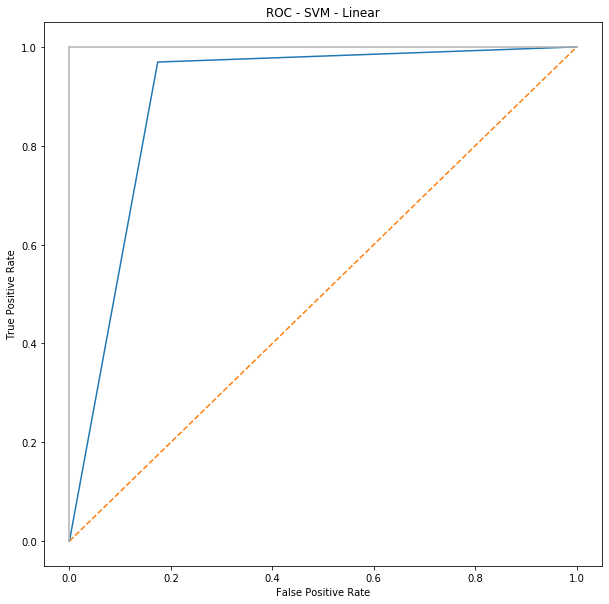

In [65]:
# ROC Curve for Linear SVM
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - Linear')
plt.plot(fpr1, tpr1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

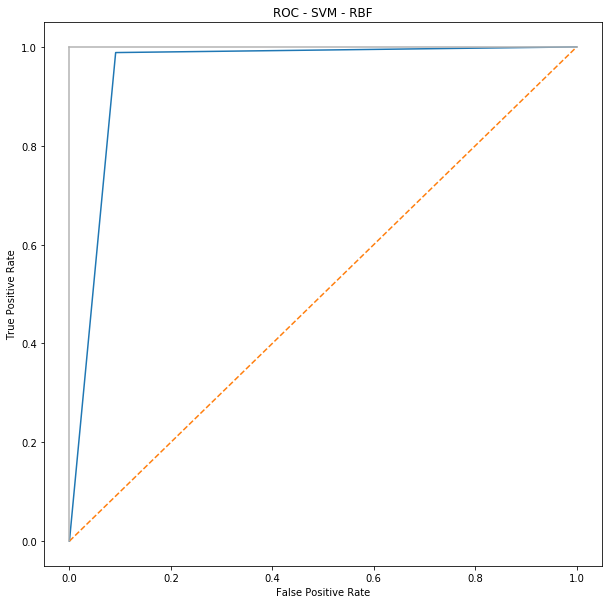

In [66]:
# ROC Curve for RBF SVM
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - RBF')
plt.plot(fpr2, tpr2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

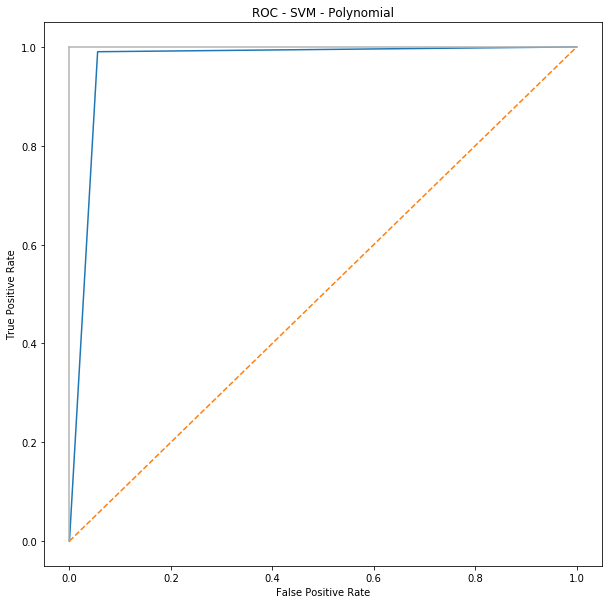

In [67]:
# ROC Curve for Polynomial SVM
plt.subplots(1, figsize=(10,10))
plt.title('ROC - SVM - Polynomial')
plt.plot(fpr3, tpr3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

In [56]:
dt = DecisionTreeClassifier()
dt.fit(x1_train, y1_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

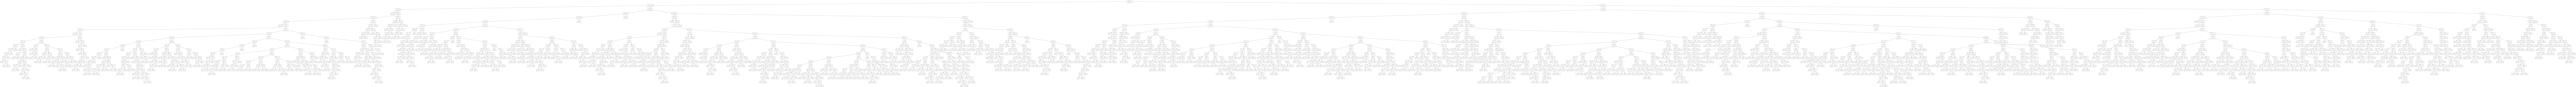

In [12]:
# Trying to visualize the tree without pruning
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=feature.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [20]:
df.columns

Index(['MWG', 'NWG', 'KWG', 'MDIMC', 'NDIMC', 'MDIMA', 'NDIMB', 'KWI', 'VWM',
       'VWN', 'STRM', 'STRN', 'SA', 'SB', 'Run', 'LogY'],
      dtype='object')

In [16]:
# Accuracy of total tree
y_pred = dt.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.9973923841059603


In [17]:
print(confusion_matrix(y1_test,y_pred))

[[11833    65]
 [   61 36361]]


In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(x1_train,y1_train)

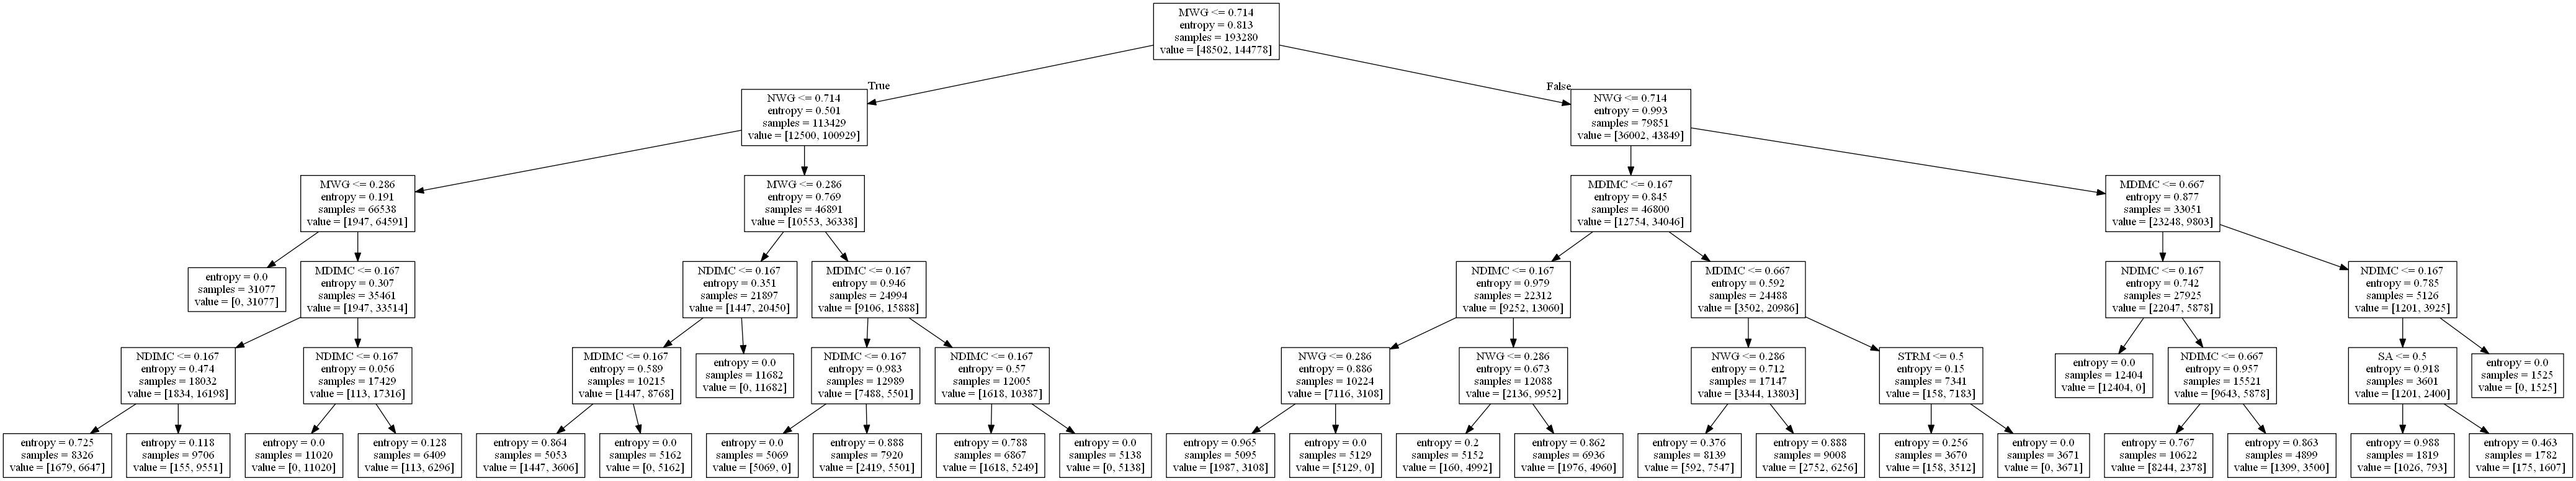

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=feature.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [21]:
#Predict the response for test dataset
y_pred = clf.predict(x1_test)
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred))

Accuracy: 0.8979511589403973


In [22]:
print(confusion_matrix(y1_test,y_pred))

[[ 7762  4136]
 [  795 35627]]


In [23]:
# Values considered for depth
depth = [3, 5, 10, 15]
alp = [0.005,0.01]

For Max_Depth: 3 CCP : 0.005 AUC score is : 0.7057914753577945 The Accuracy Score is : 0.8341680463576159
For Max_Depth: 5 CCP : 0.005 AUC score is : 0.8293696339261517 The Accuracy Score is : 0.892239238410596
For Max_Depth: 10 CCP : 0.005 AUC score is : 0.8131264702989154 The Accuracy Score is : 0.8992756622516557
For Max_Depth: 15 CCP : 0.005 AUC score is : 0.8131264702989154 The Accuracy Score is : 0.8992756622516557
For Max_Depth: 3 CCP : 0.01 AUC score is : 0.7515387137565874 The Accuracy Score is : 0.8150041390728476
For Max_Depth: 5 CCP : 0.01 AUC score is : 0.7685709966265616 The Accuracy Score is : 0.8471647350993378
For Max_Depth: 10 CCP : 0.01 AUC score is : 0.772518974292856 The Accuracy Score is : 0.8701365894039735
For Max_Depth: 15 CCP : 0.01 AUC score is : 0.7751795022208384 The Accuracy Score is : 0.8596440397350993


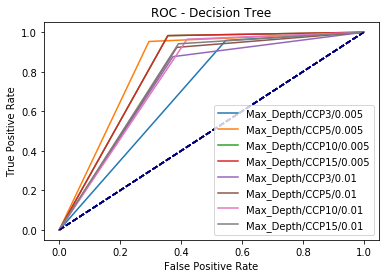

In [41]:
# Decision Tree  pruning
fpr = []
tpr = []
acc = []

for alpha in alp:
    for dep in depth:
        dtree_dep = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_depth= dep, ccp_alpha = alpha)
        dtree_dep.fit(x1_train,y1_train)
        #predicting and plotting the tree
        y_pred = dtree_dep.predict(x1_test)
        fpr, tpr, threshold = roc_curve(y1_test,  y_pred)

        accuracy = metrics.accuracy_score(y1_test, y_pred)
        acc.append(accuracy)
        auc= metrics.roc_auc_score(y1_test,  y_pred)
        print("For Max_Depth:" ,dep,"CCP :", alpha, "AUC score is :", auc,"The Accuracy Score is :" ,accuracy)

        plt.plot(fpr,tpr, label="Max_Depth/CCP" + str(dep) + '/' + str(alpha))
        #plt.plot([0, 1], ls="--")
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.legend(loc=4)
        plt.title('ROC - Decision Tree')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')

Text(0.5, 1.0, 'Depth vs Accuracy for C = 0.005')

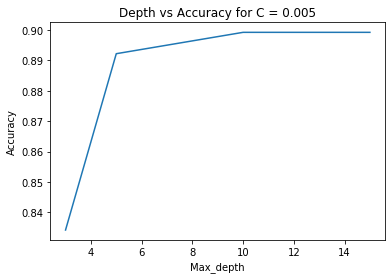

In [42]:
# Plotting depth vs Accuracy
plt.plot(depth,acc[:4])
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy for C = 0.005")

Text(0.5, 1.0, 'Depth vs Accuracy for C = 0.01')

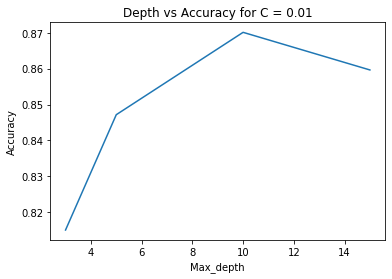

In [43]:
# Plotting depth vs Accuracy
plt.plot(depth,acc[4:8])
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy for C = 0.01")

# Boosting

In [40]:
# Finding the optimum depth and child weight using grid search
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
gsearch1.fit(feature,target)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  4.0min
[Parallel(n_jobs=4)]: Done  60 out of  60 | elapsed:  9.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n...
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=1,
                                     seed=27, subsample=0.8, tree_meth

In [41]:
# best parameter for depth and child weight
print(gsearch1.best_params_)
print(gsearch1.best_score_)

{'max_depth': 3, 'min_child_weight': 1}
0.8767384681592911


In [42]:
# Finding optimum gamma using best depth and child weight
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=3,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5, verbose = 2)
gsearch3.fit(feature, target)
gsearch3.best_params_, gsearch3.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  2.1min finished


({'gamma': 0.0}, 0.8767384681592911)

In [43]:
# fitting with the optimum values for gamma, child wieght and depth
xgb3 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 reg_alpha=0.005,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb3.fit(feature, target)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)

In [71]:
xgb3.score

<bound method ClassifierMixin.score of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0.005,
              reg_lambda=1, scale_pos_weight=1, seed=27, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=None)>

Max_Depth: 3 Accuracy is: 0.9502483443708609 Auc : 0.9076048679808058
Max_Depth: 5 Accuracy is: 0.9704470198675497 Auc : 0.9517044180902561
Max_Depth: 10 Accuracy is: 0.9942052980132451 Auc : 0.9910346109152736
Max_Depth: 15 Accuracy is: 0.9969577814569537 Auc : 0.9951523986133707


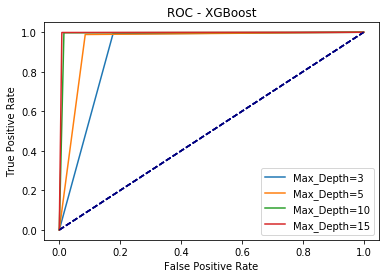

In [44]:
# varying depth with other parameters for accuracy prediction
accuracy_xgb=[]
for dep in depth:
    bst_1 = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=dep, min_child_weight=1, gamma=0, subsample=0.8,
             colsample_bytree=0.8, reg_alpha=0.005, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

    bst_1.fit(x1_train, y1_train)
    pred_xgb1=bst_1.predict(x1_test)

    accuracy_xgb.append(metrics.accuracy_score(y1_test, pred_xgb1))
    fpr, tpr, _ = metrics.roc_curve(y1_test,  pred_xgb1)
    auc = metrics.roc_auc_score(y1_test,  pred_xgb1)
    plt.plot(fpr,tpr, label="Max_Depth=" +str(dep))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.legend(loc=4)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC - XGBoost")
    print("Max_Depth:" , dep, "Accuracy is:", metrics.accuracy_score(y1_test, pred_xgb1), "Auc :", auc)


In [ ]:
# Plotting depth vs Accuracy
plt.plot(depth,accuracy_xgb)
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy")

# Cross Validation

In [12]:
svm_lin1 = svm.SVC(kernel = 'linear')
acc_lin = cross_val_score(svm_lin1, feature, target,cv=5).mean()
print('The accuracy for SVM Linear after Cross Validation',acc_lin)

The accuracy for SVM Linear after Cross Validation 0.8635968543046358


In [12]:
svm_rbf1 = svm.SVC(kernel = 'rbf')
acc_rbf = cross_val_score(svm_rbf1,feature,target,cv=5).mean()
print('The accuracy for SVM rbf after Cross Validation',acc_rbf)

The accuracy for SVM rbf after Cross Validation 0.807330298013245


In [13]:
svm_poly1 = svm.SVC(kernel = 'poly', degree = 5)
acc_poly = cross_val_score(svm_poly1,feature,target,cv=5).mean()
print('The accuracy for SVM Polynomial after Cross Validation',acc_poly)

The accuracy for SVM Polynomial after Cross Validation 0.8215562913907284


In [128]:
# Cross Validation for Decision Tree
print("Cross Validation for Decision Tree")
accuracy_cv_dt=[]
for dep in depth:
    dtclss = DecisionTreeClassifier(criterion = "gini", splitter='random',max_depth=dep,max_leaf_nodes=10)
    cv_dt=cross_val_score(dtclss,feature,target,cv =5)
    accuracy_cv_dt.append(np.mean(cv_dt))
    print("Max_Depth:" ,dep, "Mean Accuracy Score: " ,np.mean(cv_dt))

Cross Validation for Decision Tree
Max_Depth: 3 Mean Accuracy Score:  0.6416680463576159
Max_Depth: 5 Mean Accuracy Score:  0.5469329470198676
Max_Depth: 10 Mean Accuracy Score:  0.629362582781457
Max_Depth: 15 Mean Accuracy Score:  0.6639610927152318


Text(0.5, 1.0, 'Depth vs Accuracy CV Decision Trees')

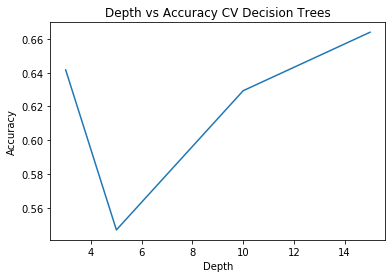

In [129]:
plt.plot(depth,accuracy_cv_dt)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy CV Decision Trees")

In [141]:
# Cross Validation for XGBoost
accuracy_cv_xgb=[]
for dep in depth:
    bst_cv=XGBClassifier(n_estimators=500,max_depth=dep)
    cv_dt=cross_val_score(bst_cv,feature,target,cv =5)
    accuracy_cv_xgb.append(np.mean(cv_dt))
    print("Max_Depth:", dep, "Mean Accuracy Score :", np.mean(cv_dt))

Max_Depth: 3 Mean Accuracy Score : 0.6871895695364237
Max_Depth: 5 Mean Accuracy Score : 0.6925951986754967
Max_Depth: 10 Mean Accuracy Score : 0.6717591059602649
Max_Depth: 15 Mean Accuracy Score : 0.6606001655629139


Text(0.5, 1.0, 'Depth vs Accuracy CV XGBoost')

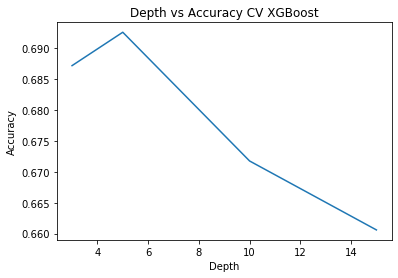

In [142]:
plt.plot(depth,accuracy_cv_xgb)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.title("Depth vs Accuracy CV XGBoost")

# Neural network

In [14]:
#function to plot the learning curves
def plot_for_epoch(acc,val_acc,param,model):
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('{} model for {}'.format(model, param))
    plt.ylabel('{}'.format(model))
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [15]:
def ann_single_activation(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x1_train, y1_train, test_size = 0.1, random_state = 0)

    np.random.seed(1337)
    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(Dense(nodes[i+1], activation=param))
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    print("Fitting for ANN model with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=70, batch_size=64, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor], shuffle = False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x1_test)
    te_acc = accuracy_score(y_pred,y1_test)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y1_test,y_pred)
    print(cm)
    print(classification_report(y1_test,y_pred)) 
    print("AUC",roc_auc_score(y1_test,y_pred))
    
    plot_for_epoch(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [24]:
def ann_batch_normalization(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x1_train, y1_train, test_size = 0.1, random_state = 0)

    np.random.seed(1337)
    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(BatchNormalization())
        model.add(Dense(nodes[i+1], activation=param))
    model.add(BatchNormalization())
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    print("Fitting for ANN model using batch normalization with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=100, batch_size=64, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor],shuffle=False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x1_test)
    te_acc = accuracy_score(y_pred,y1_test)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y1_test,y_pred)
    print("Confusion Matrix : \n",cm)
    print(classification_report(y1_test,y_pred)) 
    print("AUC",roc_auc_score(y1_test,y_pred))
    
    plot_for_epoch(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [25]:
def ann_dropout(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x1_train, y1_train, test_size = 0.1, random_state = 0)

    np.random.seed(1337)
    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(Dropout(0.25))
        model.add(Dense(nodes[i+1], activation=param))
    model.add(Dropout(0.25))
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    print("Fitting for ANN model using dropout with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=100, batch_size=64, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor],shuffle=False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x1_test)
    te_acc = accuracy_score(y_pred,y1_test)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y1_test,y_pred)
    print("Confusion Matrix : \n",cm)
    print(classification_report(y1_test,y_pred)) 
    print("AUC",roc_auc_score(y1_test,y_pred))
    
    plot_for_epoch(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [26]:
def ann_adam_optimizer(param, nodes):
    # split with 10% of validation data to prepare during model fit
    train, val_train, test, val_test = train_test_split(x1_train, y1_train, test_size = 0.1, random_state = 0)

    np.random.seed(1337)
    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(nodes[0], input_dim=train.shape[1], activation=param))
    for i in range(len(nodes)-2):
        model.add(Dense(nodes[i+1], activation=param))
    model.add(Dense(nodes[-1], activation='sigmoid'))

    print('Model Summary is \n')
    print(model.summary())
    
    # optimizer adam
    adam = optimizers.adam(lr = 0.0001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    
    print("Fitting for ANN model using Adam Optimizer with {} layers and {} activation".format(len(nodes),param))
    history = model.fit(train, test, epochs=100, batch_size=64, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor], shuffle=False)
    
    # evaluate the training set
    _, tr_acc = model.evaluate(train, test)
    print('\n')
    print('Training Accuracy: %.2f' % (tr_acc*100))
    print('\n')
    y_pred = model.predict_classes(x1_test)
    te_acc = accuracy_score(y_pred,y1_test)
    print('Test Accuracy: %.2f' % (te_acc*100))
    print('\n')
    cm = confusion_matrix(y1_test,y_pred)
    print("Confusion Matrix : \n",cm)
    print(classification_report(y1_test,y_pred)) 
    print("AUC",roc_auc_score(y1_test,y_pred))
    
    plot_for_epoch(history.history['accuracy'], history.history['val_accuracy'], param, 'accuracy')
    plot_for_epoch(history.history['loss'], history.history['val_loss'], param, 'loss')
    
    return (cm, tr_acc, te_acc,history.history)

In [19]:
def model_act(act_param, comb):
    tr_ac_sig = list()
    te_ac_sig = list()
    cm_sig = list()
    #comb = [[20,16,1],[16,20,18,1],[25,25,25,25,1]]
    for i in comb:
        cm,tr_ac,te_ac,_ = ann_single_activation(act_param,i)
        cm_sig.append(cm)
        tr_ac_sig.append(tr_ac)
        te_ac_sig.append(te_ac)
    final_tr1 = np.mean(tr_ac_sig)
    final_te1 = np.mean(te_ac_sig)
    YY1 = tr_ac_sig
    YY2 = te_ac_sig
    ax = plt.subplot()
    t1 = ['1','2','3']
    plt.plot(t1, YY1,color='blue', linewidth=2, markersize=5, marker='o')
    plt.plot(t1,YY2,color='green', linewidth=2, markersize=5, marker='o')
    ax.plot(t1, YY1, label='training accuracy')
    ax.plot(t1, YY2, label='test accuracy')
    plt.xlabel('Layer Combinations')
    plt.ylabel('Accuracy')
    plt.title('{} ANN Performance'.format(act_param))
    print("Combination 1 : ",comb[0])
    print("Combination 2 : ",comb[1])
    print("Combination 3 : ",comb[2])
    ax.legend()

Model Summary is 

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_170 (Dense)            (None, 1)                 21        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 12s 69us/step - loss: 0.2724 - accuracy: 0.8975 - val_loss: 0.1941 - val_accuracy: 0.9332
Epoch 2/70
173952/173952 [==============================] - 12s 68us/step - loss: 0.1903 - accuracy: 0.9317 - val_loss: 0.1844 - val_accuracy: 0.9347
Epoch 3/70
173952/173952 [==============================] - 14s 81us/step - loss: 0.18

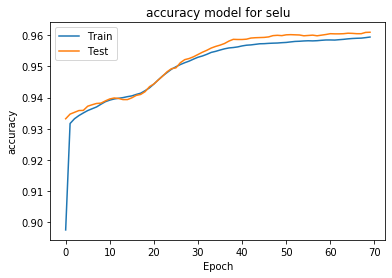

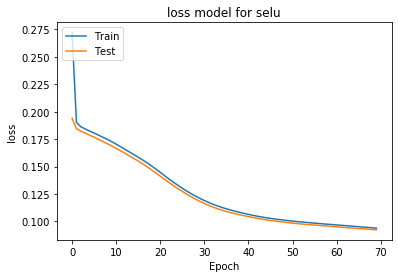

Model Summary is 

Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_171 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_172 (Dense)            (None, 1)                 31        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 18s 104us/step - loss: 0.2762 - accuracy: 0.8944 - val_loss: 0.1906 - val_accuracy: 0.9332
Epoch 2/70
173952/173952 [==============================] - 18s 106us/step - loss: 0.1860 - accuracy: 0.9333 - val_loss: 0.1794 - val_accuracy: 0.9345
Epoch 3/70
173952/173952 [==============================] - 18s 104us/step - loss: 0

173952/173952 [==============================] - 17s 99us/step - loss: 0.0957 - accuracy: 0.9607 - val_loss: 0.0946 - val_accuracy: 0.9625
Epoch 51/70
173952/173952 [==============================] - 15s 89us/step - loss: 0.0952 - accuracy: 0.9608 - val_loss: 0.0942 - val_accuracy: 0.9626
Epoch 52/70
173952/173952 [==============================] - 18s 106us/step - loss: 0.0948 - accuracy: 0.9610 - val_loss: 0.0937 - val_accuracy: 0.9627
Epoch 53/70
173952/173952 [==============================] - 19s 107us/step - loss: 0.0943 - accuracy: 0.9612 - val_loss: 0.0934 - val_accuracy: 0.9629
Epoch 54/70
173952/173952 [==============================] - 18s 101us/step - loss: 0.0939 - accuracy: 0.9614 - val_loss: 0.0930 - val_accuracy: 0.9630
Epoch 55/70
173952/173952 [==============================] - 18s 102us/step - loss: 0.0935 - accuracy: 0.9616 - val_loss: 0.0927 - val_accuracy: 0.9629
Epoch 56/70
173952/173952 [==============================] - 17s 99us/step - loss: 0.0932 - accuracy: 

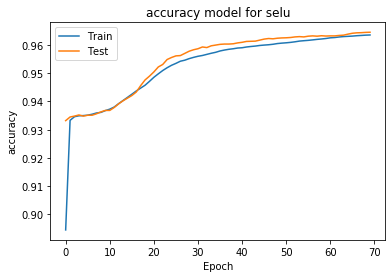

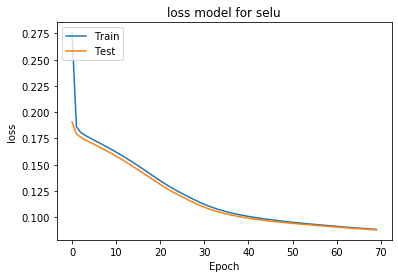

Model Summary is 

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_173 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_174 (Dense)            (None, 1)                 41        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 10s 59us/step - loss: 0.2507 - accuracy: 0.9078 - val_loss: 0.1903 - val_accuracy: 0.9326
Epoch 2/70
173952/173952 [==============================] - 10s 58us/step - loss: 0.1880 - accuracy: 0.9327 - val_loss: 0.1822 - val_accuracy: 0.9343
Epoch 3/70
173952/173952 [==============================] - 10s 58us/step - loss: 0.18

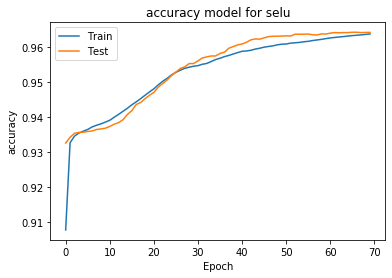

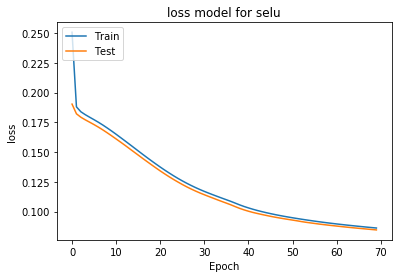

Combination 1 :  [20, 1]
Combination 2 :  [30, 1]
Combination 3 :  [40, 1]


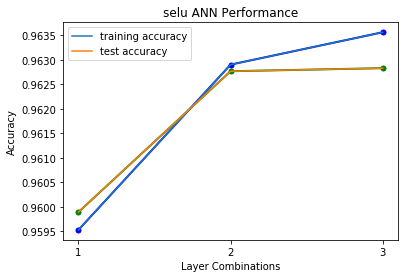

In [67]:
#Selu Activation with 1 layer combination
comb = [[20,1],[30,1],[40,1]]
model_act('selu', comb)

Model Summary is 

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_136 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_137 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 21        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 24us/step - loss: 0.2288 - accuracy: 0.9124 - val_loss: 0.1714 - val_accuracy: 0.9348
Epoch 2/70
173952/173952 [==============================] - 4s 24us/step - loss: 0.1695 - accuracy: 0.936

Epoch 50/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0698 - accuracy: 0.9697 - val_loss: 0.0735 - val_accuracy: 0.9671
Epoch 51/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0693 - accuracy: 0.9699 - val_loss: 0.0731 - val_accuracy: 0.9670
Epoch 52/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0689 - accuracy: 0.9700 - val_loss: 0.0727 - val_accuracy: 0.9674
Epoch 53/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.0684 - accuracy: 0.9703 - val_loss: 0.0720 - val_accuracy: 0.9680
Epoch 54/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.0680 - accuracy: 0.9706 - val_loss: 0.0716 - val_accuracy: 0.9680
Epoch 55/70
173952/173952 [==============================] - 5s 29us/step - loss: 0.0675 - accuracy: 0.9707 - val_loss: 0.0715 - val_accuracy: 0.9680
Epoch 56/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.0670 - accuracy:

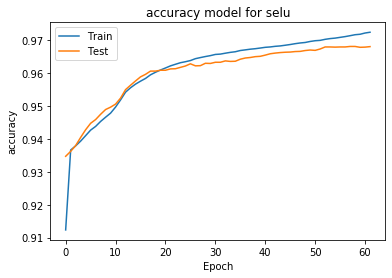

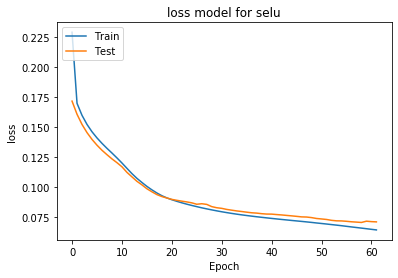

Model Summary is 

Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_140 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 31        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.2182 - accuracy: 0.9167 - val_loss: 0.1733 - val_accuracy: 0.9333
Epoch 2/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.1719 - accuracy: 0

Epoch 50/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0579 - accuracy: 0.9753 - val_loss: 0.0596 - val_accuracy: 0.9736
Epoch 51/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0573 - accuracy: 0.9755 - val_loss: 0.0590 - val_accuracy: 0.9741
Epoch 52/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0567 - accuracy: 0.9758 - val_loss: 0.0585 - val_accuracy: 0.9744
Epoch 53/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0561 - accuracy: 0.9761 - val_loss: 0.0580 - val_accuracy: 0.9750
Epoch 54/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0556 - accuracy: 0.9764 - val_loss: 0.0577 - val_accuracy: 0.9750
Epoch 55/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0551 - accuracy: 0.9767 - val_loss: 0.0577 - val_accuracy: 0.9750
Epoch 56/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0546 - accuracy:

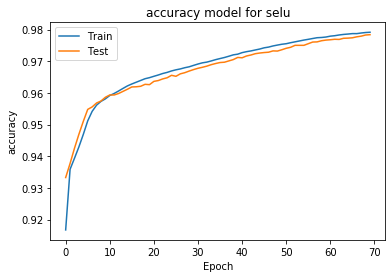

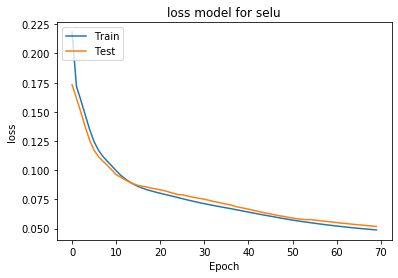

Model Summary is 

Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_143 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 41        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 24us/step - loss: 0.2227 - accuracy: 0.9164 - val_loss: 0.1778 - val_accuracy: 0.9338
Epoch 2/70
173952/173952 [==============================] - 5s 27us/step - loss: 0.1793 - accuracy: 0

Epoch 50/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.0611 - accuracy: 0.9741 - val_loss: 0.0612 - val_accuracy: 0.9727
Epoch 51/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0605 - accuracy: 0.9743 - val_loss: 0.0608 - val_accuracy: 0.9730
Epoch 52/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0599 - accuracy: 0.9745 - val_loss: 0.0603 - val_accuracy: 0.9735
Epoch 53/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0593 - accuracy: 0.9748 - val_loss: 0.0599 - val_accuracy: 0.9737
Epoch 54/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0587 - accuracy: 0.9751 - val_loss: 0.0594 - val_accuracy: 0.9738
Epoch 55/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.0581 - accuracy: 0.9754 - val_loss: 0.0588 - val_accuracy: 0.9739
Epoch 56/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.0575 - accuracy:

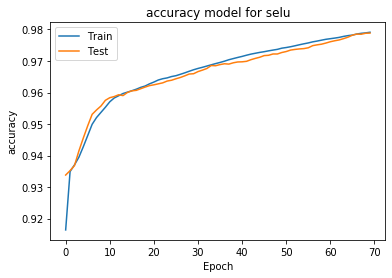

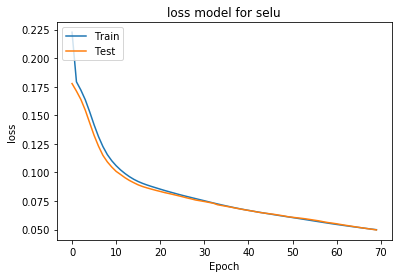

Combination 1 :  [20, 20, 1]
Combination 2 :  [30, 30, 1]
Combination 3 :  [40, 40, 1]


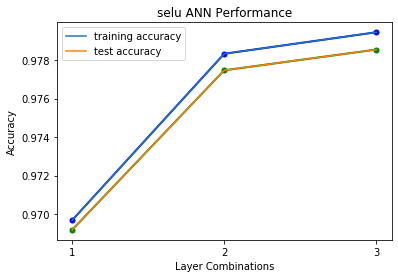

In [63]:
#Selu Activation with 2 layer combination
comb = [[20,20,1],[30,30,1],[40,40,1]]
model_act('selu', comb)

Model Summary is 

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_145 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_146 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_147 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_148 (Dense)            (None, 1)                 21        
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 5s 26us/step - loss: 0.2021 - accuracy: 0.9227 - val_loss:

Epoch 49/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0505 - accuracy: 0.9781 - val_loss: 0.0532 - val_accuracy: 0.9770
Epoch 50/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0499 - accuracy: 0.9783 - val_loss: 0.0527 - val_accuracy: 0.9771
Epoch 51/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0492 - accuracy: 0.9786 - val_loss: 0.0514 - val_accuracy: 0.9775
Epoch 52/70
173952/173952 [==============================] - 4s 26us/step - loss: 0.0487 - accuracy: 0.9789 - val_loss: 0.0504 - val_accuracy: 0.9778
Epoch 53/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0481 - accuracy: 0.9791 - val_loss: 0.0492 - val_accuracy: 0.9786
Epoch 54/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0476 - accuracy: 0.9793 - val_loss: 0.0482 - val_accuracy: 0.9787
Epoch 55/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0471 - accuracy:

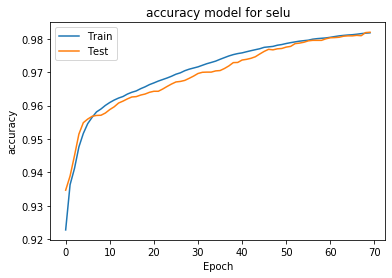

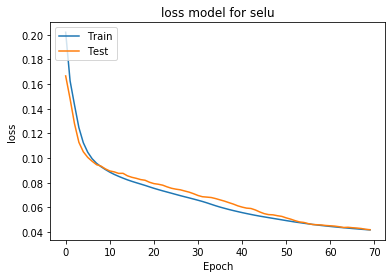

Model Summary is 

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_150 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_151 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_152 (Dense)            (None, 1)                 31        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 26us/step - loss: 0.2023 - accuracy: 0.9214 - val_loss:

Epoch 49/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0401 - accuracy: 0.9827 - val_loss: 0.0402 - val_accuracy: 0.9831
Epoch 50/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0397 - accuracy: 0.9828 - val_loss: 0.0398 - val_accuracy: 0.9833
Epoch 51/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0394 - accuracy: 0.9830 - val_loss: 0.0394 - val_accuracy: 0.9835
Epoch 52/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0390 - accuracy: 0.9832 - val_loss: 0.0390 - val_accuracy: 0.9838
Epoch 53/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0387 - accuracy: 0.9833 - val_loss: 0.0389 - val_accuracy: 0.9837
Epoch 54/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0383 - accuracy: 0.9834 - val_loss: 0.0385 - val_accuracy: 0.9838
Epoch 55/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0380 - accuracy:

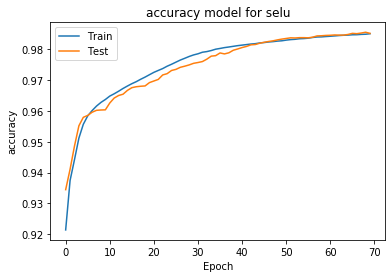

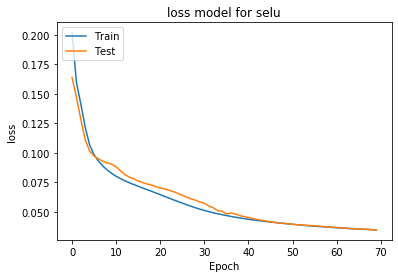

Model Summary is 

Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_153 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_154 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_155 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 41        
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 5s 26us/step - loss: 0.1955 - accuracy: 0.9265 - val_loss:

Epoch 49/70
173952/173952 [==============================] - 5s 27us/step - loss: 0.0403 - accuracy: 0.9826 - val_loss: 0.0445 - val_accuracy: 0.9812
Epoch 50/70
173952/173952 [==============================] - 5s 27us/step - loss: 0.0398 - accuracy: 0.9828 - val_loss: 0.0441 - val_accuracy: 0.9814
Epoch 51/70
173952/173952 [==============================] - 5s 27us/step - loss: 0.0394 - accuracy: 0.9832 - val_loss: 0.0436 - val_accuracy: 0.9816
Epoch 52/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0390 - accuracy: 0.9832 - val_loss: 0.0432 - val_accuracy: 0.9817
Epoch 53/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0386 - accuracy: 0.9834 - val_loss: 0.0424 - val_accuracy: 0.9823
Epoch 54/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0383 - accuracy: 0.9836 - val_loss: 0.0422 - val_accuracy: 0.9822
Epoch 55/70
173952/173952 [==============================] - 5s 28us/step - loss: 0.0379 - accuracy:

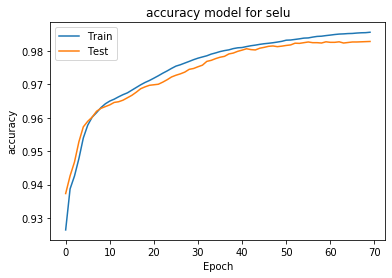

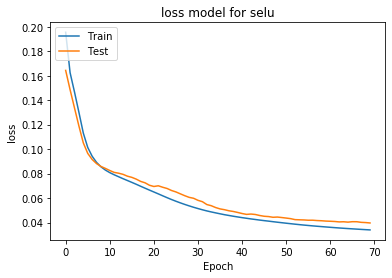

Combination 1 :  [20, 20, 20, 1]
Combination 2 :  [30, 30, 30, 1]
Combination 3 :  [40, 40, 40, 1]


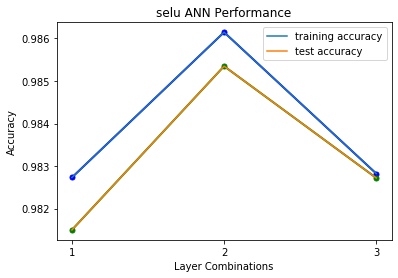

In [64]:
#Selu Activation with 3 layer combination
comb = [[20,20,20,1],[30,30,30,1],[40,40,40,1]]
model_act('selu', comb)

Model Summary is 

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_241 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_242 (Dense)            (None, 1)                 21        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.3077 - accuracy: 0.8803 - val_loss: 0.2039 - val_accuracy: 0.9307
Epoch 2/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.1915 - accuracy: 0.9308 - val_loss: 0.1814 - val_accuracy: 0.9348
Epoch 3/70
173952/173952 [==============================] - 4s 20us/step - loss: 0.1807 

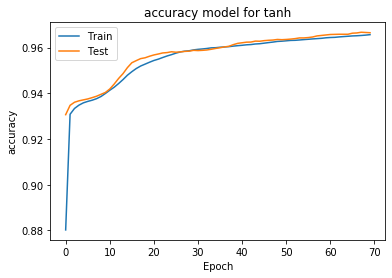

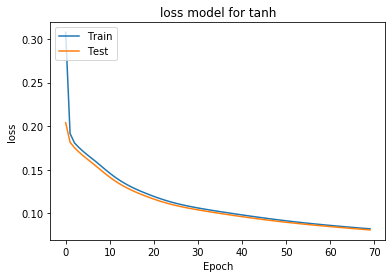

Model Summary is 

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_243 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_244 (Dense)            (None, 1)                 31        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.3014 - accuracy: 0.8832 - val_loss: 0.2021 - val_accuracy: 0.9299
Epoch 2/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.1920 - accuracy: 0.9310 - val_loss: 0.1829 - val_accuracy: 0.9343
Epoch 3/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.1831 

Epoch 51/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0934 - accuracy: 0.9619 - val_loss: 0.0919 - val_accuracy: 0.9625
Epoch 52/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0928 - accuracy: 0.9620 - val_loss: 0.0913 - val_accuracy: 0.9624
Epoch 53/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0921 - accuracy: 0.9621 - val_loss: 0.0908 - val_accuracy: 0.9624
Epoch 54/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0915 - accuracy: 0.9623 - val_loss: 0.0902 - val_accuracy: 0.9625
Epoch 55/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0909 - accuracy: 0.9626 - val_loss: 0.0896 - val_accuracy: 0.9625
Epoch 56/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0903 - accuracy: 0.9627 - val_loss: 0.0891 - val_accuracy: 0.9625
Epoch 57/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.0898 - accuracy:

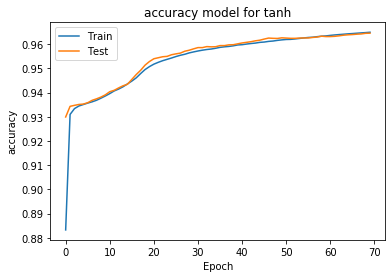

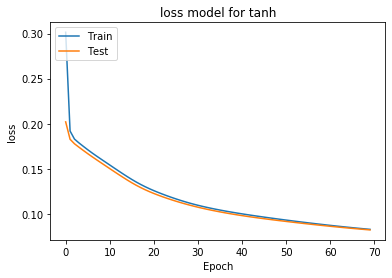

Model Summary is 

Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_245 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_246 (Dense)            (None, 1)                 41        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.2948 - accuracy: 0.8862 - val_loss: 0.2025 - val_accuracy: 0.9313
Epoch 2/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.1937 - accuracy: 0.9314 - val_loss: 0.1855 - val_accuracy: 0.9339
Epoch 3/70
173952/173952 [==============================] - 4s 21us/step - loss: 0.1865 

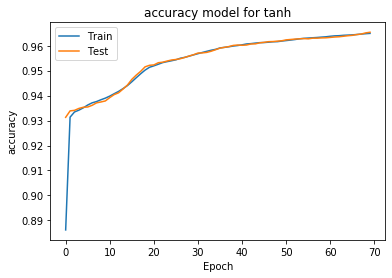

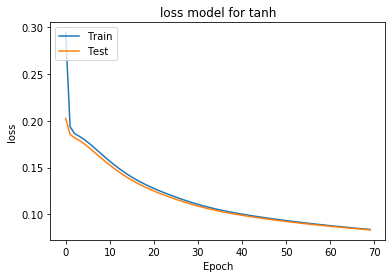

Combination 1 :  [20, 1]
Combination 2 :  [30, 1]
Combination 3 :  [40, 1]


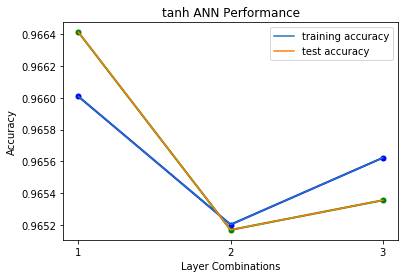

In [76]:
#Tanh Activation with 1 layer combination
comb = [[20,1],[30,1],[40,1]]
model_act('tanh', comb)

Model Summary is 

Model: "sequential_70"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_181 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_182 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_183 (Dense)            (None, 1)                 21        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 10s 58us/step - loss: 0.2619 - accuracy: 0.8969 - val_loss: 0.1777 - val_accuracy: 0.9339
Epoch 2/70
173952/173952 [==============================] - 10s 58us/step - loss: 0.1781 - accuracy: 0.9

Epoch 50/70
173952/173952 [==============================] - 8s 44us/step - loss: 0.0653 - accuracy: 0.9715 - val_loss: 0.0651 - val_accuracy: 0.9720
Epoch 51/70
173952/173952 [==============================] - 7s 39us/step - loss: 0.0647 - accuracy: 0.9718 - val_loss: 0.0645 - val_accuracy: 0.9722
Epoch 52/70
173952/173952 [==============================] - 6s 35us/step - loss: 0.0641 - accuracy: 0.9721 - val_loss: 0.0640 - val_accuracy: 0.9725
Epoch 53/70
173952/173952 [==============================] - 9s 53us/step - loss: 0.0636 - accuracy: 0.9724 - val_loss: 0.0635 - val_accuracy: 0.9728
Epoch 54/70
173952/173952 [==============================] - 8s 45us/step - loss: 0.0630 - accuracy: 0.9726 - val_loss: 0.0630 - val_accuracy: 0.9729
Epoch 55/70
173952/173952 [==============================] - 9s 50us/step - loss: 0.0625 - accuracy: 0.9729 - val_loss: 0.0625 - val_accuracy: 0.9733
Epoch 56/70
173952/173952 [==============================] - 10s 56us/step - loss: 0.0620 - accuracy

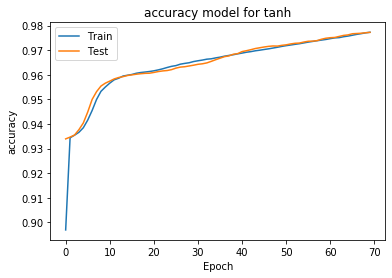

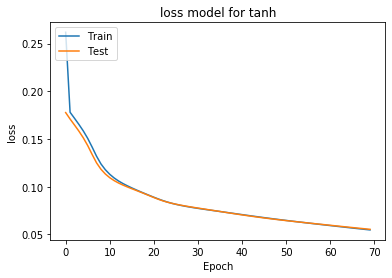

Model Summary is 

Model: "sequential_71"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_185 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_186 (Dense)            (None, 1)                 31        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 10s 56us/step - loss: 0.2498 - accuracy: 0.9026 - val_loss: 0.1755 - val_accuracy: 0.9348
Epoch 2/70
173952/173952 [==============================] - 6s 35us/step - loss: 0.1738 - accuracy: 

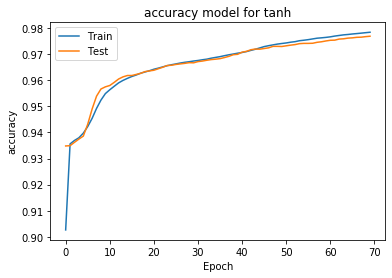

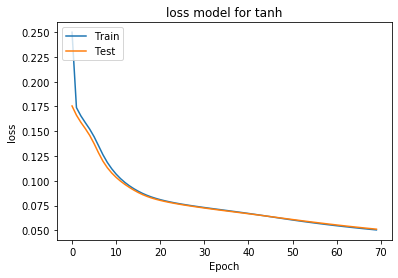

Model Summary is 

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_188 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_189 (Dense)            (None, 1)                 41        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 3s 20us/step - loss: 0.2399 - accuracy: 0.9064 - val_loss: 0.1736 - val_accuracy: 0.9344
Epoch 2/70
173952/173952 [==============================] - 4s 20us/step - loss: 0.1736 - accuracy: 0

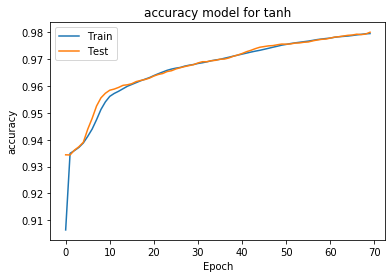

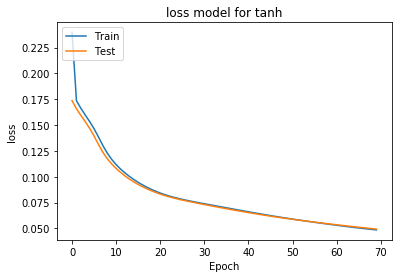

Combination 1 :  [20, 20, 1]
Combination 2 :  [30, 30, 1]
Combination 3 :  [40, 40, 1]


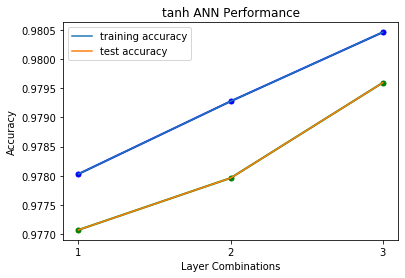

In [69]:
#Tanh Activation with 2 layer combination
comb = [[20,20,1],[30,30,1],[40,40,1]]
model_act('tanh', comb)

Model Summary is 

Model: "sequential_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_190 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_191 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_192 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_193 (Dense)            (None, 1)                 21        
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.2212 - accuracy: 0.9132 - val_loss:

173952/173952 [==============================] - 3s 19us/step - loss: 0.0517 - accuracy: 0.9777 - val_loss: 0.0512 - val_accuracy: 0.9786
Epoch 49/70
173952/173952 [==============================] - 3s 19us/step - loss: 0.0511 - accuracy: 0.9779 - val_loss: 0.0507 - val_accuracy: 0.9787
Epoch 50/70
173952/173952 [==============================] - 3s 19us/step - loss: 0.0505 - accuracy: 0.9781 - val_loss: 0.0502 - val_accuracy: 0.9788
Epoch 51/70
173952/173952 [==============================] - 3s 19us/step - loss: 0.0500 - accuracy: 0.9784 - val_loss: 0.0497 - val_accuracy: 0.9792
Epoch 52/70
173952/173952 [==============================] - 3s 19us/step - loss: 0.0494 - accuracy: 0.9786 - val_loss: 0.0492 - val_accuracy: 0.9795
Epoch 53/70
173952/173952 [==============================] - 3s 19us/step - loss: 0.0489 - accuracy: 0.9789 - val_loss: 0.0488 - val_accuracy: 0.9797
Epoch 54/70
173952/173952 [==============================] - 3s 19us/step - loss: 0.0484 - accuracy: 0.9791 - va

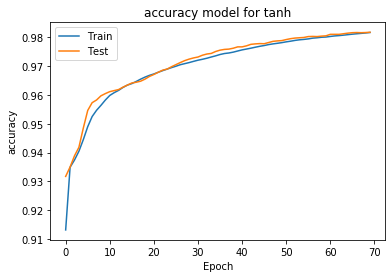

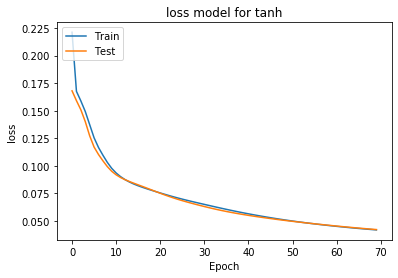

Model Summary is 

Model: "sequential_74"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_194 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_195 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_196 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_197 (Dense)            (None, 1)                 31        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 22us/step - loss: 0.2377 - accuracy: 0.9047 - val_loss:

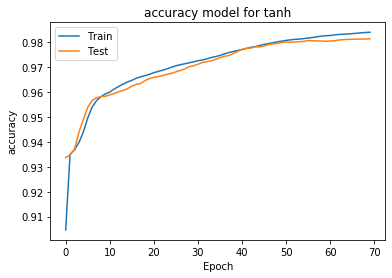

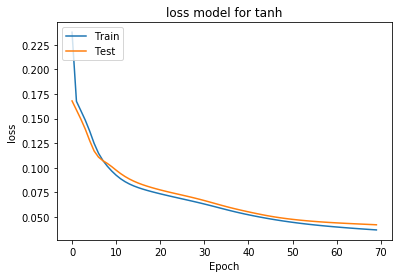

Model Summary is 

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_199 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_200 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_201 (Dense)            (None, 1)                 41        
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and tanh activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 23us/step - loss: 0.2213 - accuracy: 0.9140 - val_loss:

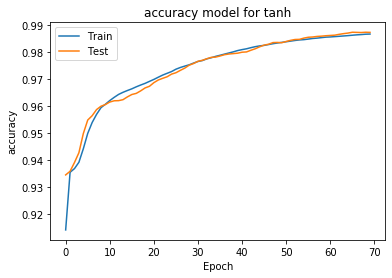

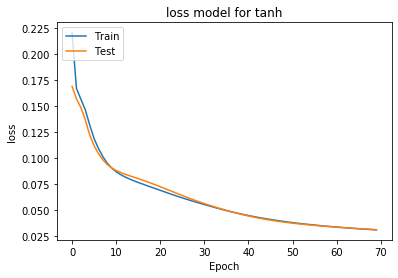

Combination 1 :  [20, 20, 20, 1]
Combination 2 :  [30, 30, 30, 1]
Combination 3 :  [40, 40, 40, 1]


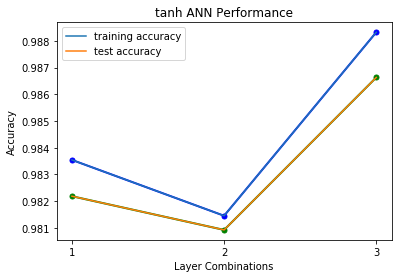

In [70]:
#Tanh Activation with 3 layer combination
comb = [[20,20,20,1],[30,30,30,1],[40,40,40,1]]
model_act('tanh', comb)

Model Summary is 

Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_202 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_203 (Dense)            (None, 1)                 21        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 8s 46us/step - loss: 0.3431 - accuracy: 0.8575 - val_loss: 0.2108 - val_accuracy: 0.9303
Epoch 2/70
173952/173952 [==============================] - 10s 56us/step - loss: 0.1964 - accuracy: 0.9312 - val_loss: 0.1861 - val_accuracy: 0.9342
Epoch 3/70
173952/173952 [==============================] - 9s 51us/step - loss: 0.1868

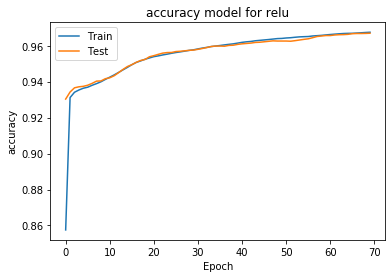

Model Summary is 

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_204 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_205 (Dense)            (None, 1)                 31        
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 17s 100us/step - loss: 0.3050 - accuracy: 0.8804 - val_loss: 0.1989 - val_accuracy: 0.9331
Epoch 2/70
173952/173952 [==============================] - 18s 103us/step - loss: 0.1870 - accuracy: 0.9331 - val_loss: 0.1760 - val_accuracy: 0.9359
Epoch 3/70
173952/173952 [==============================] - 18s 103us/step - loss: 0

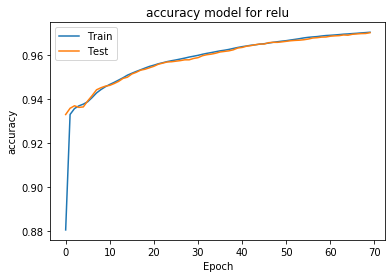

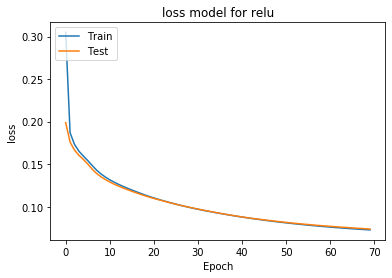

Model Summary is 

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_207 (Dense)            (None, 1)                 41        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 2 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 17s 96us/step - loss: 0.3156 - accuracy: 0.8718 - val_loss: 0.2026 - val_accuracy: 0.9305
Epoch 2/70
173952/173952 [==============================] - 17s 98us/step - loss: 0.1905 - accuracy: 0.9321 - val_loss: 0.1795 - val_accuracy: 0.9362
Epoch 3/70
173952/173952 [==============================] - 17s 99us/step - loss: 0.17

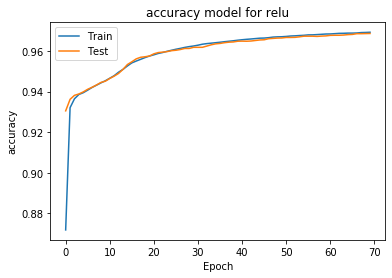

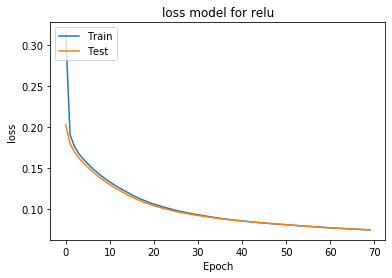

Combination 1 :  [20, 1]
Combination 2 :  [30, 1]
Combination 3 :  [40, 1]


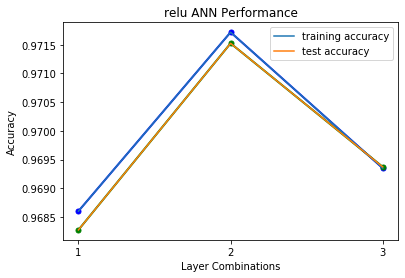

In [71]:
#Relu Activation with 1 layer combination
comb = [[20,1],[30,1],[40,1]]
model_act('relu', comb)

Model Summary is 

Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_208 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_209 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_210 (Dense)            (None, 1)                 21        
Total params: 741
Trainable params: 741
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 16s 94us/step - loss: 0.2897 - accuracy: 0.8788 - val_loss: 0.1741 - val_accuracy: 0.9355
Epoch 2/70
173952/173952 [==============================] - 17s 96us/step - loss: 0.1673 - accuracy: 0.9

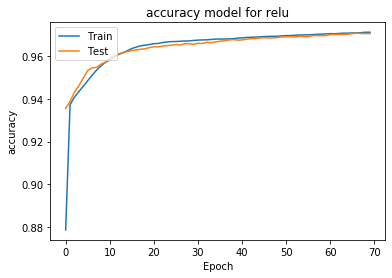

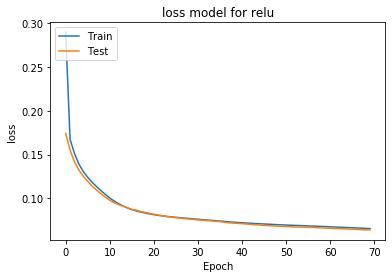

Model Summary is 

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_212 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_213 (Dense)            (None, 1)                 31        
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 17s 96us/step - loss: 0.2665 - accuracy: 0.8937 - val_loss: 0.1790 - val_accuracy: 0.9345
Epoch 2/70
173952/173952 [==============================] - 17s 96us/step - loss: 0.1774 - accuracy:

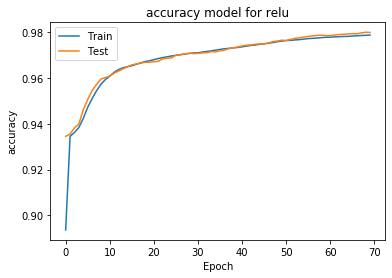

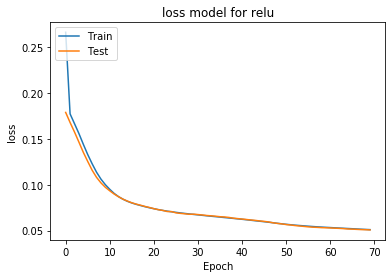

Model Summary is 

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_215 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_216 (Dense)            (None, 1)                 41        
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 3 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 24s 139us/step - loss: 0.2722 - accuracy: 0.8919 - val_loss: 0.1721 - val_accuracy: 0.9350
Epoch 2/70
173952/173952 [==============================] - 24s 139us/step - loss: 0.1660 - accurac

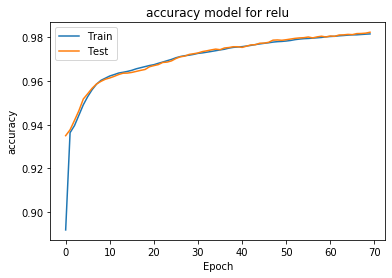

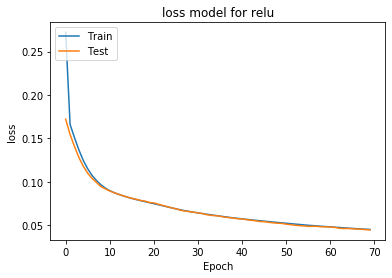

Combination 1 :  [20, 20, 1]
Combination 2 :  [30, 30, 1]
Combination 3 :  [40, 40, 1]


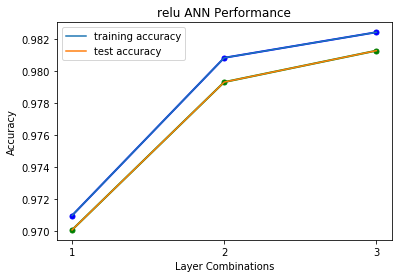

In [72]:
#Relu Activation with 2 layer combination
comb = [[20,20,1],[30,30,1],[40,40,1]]
model_act('relu', comb)

Model Summary is 

Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 20)                300       
_________________________________________________________________
dense_218 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_219 (Dense)            (None, 20)                420       
_________________________________________________________________
dense_220 (Dense)            (None, 1)                 21        
Total params: 1,161
Trainable params: 1,161
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 5s 26us/step - loss: 0.3003 - accuracy: 0.8718 - val_loss:

Epoch 49/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0516 - accuracy: 0.9776 - val_loss: 0.0519 - val_accuracy: 0.9774
Epoch 50/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0509 - accuracy: 0.9778 - val_loss: 0.0514 - val_accuracy: 0.9773
Epoch 51/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0503 - accuracy: 0.9780 - val_loss: 0.0515 - val_accuracy: 0.9775
Epoch 52/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0497 - accuracy: 0.9781 - val_loss: 0.0513 - val_accuracy: 0.9774
Epoch 53/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0492 - accuracy: 0.9784 - val_loss: 0.0508 - val_accuracy: 0.9773
Epoch 54/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0487 - accuracy: 0.9786 - val_loss: 0.0501 - val_accuracy: 0.9775
Epoch 55/70
173952/173952 [==============================] - 4s 24us/step - loss: 0.0483 - accuracy:

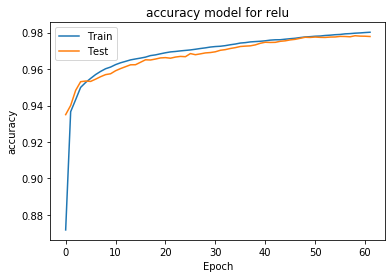

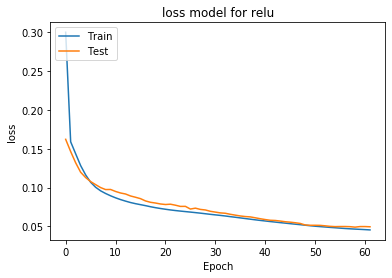

Model Summary is 

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_221 (Dense)            (None, 30)                450       
_________________________________________________________________
dense_222 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_223 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_224 (Dense)            (None, 1)                 31        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.2635 - accuracy: 0.8880 - val_loss:

Epoch 49/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0455 - accuracy: 0.9801 - val_loss: 0.0465 - val_accuracy: 0.9803
Epoch 50/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0451 - accuracy: 0.9805 - val_loss: 0.0459 - val_accuracy: 0.9809
Epoch 51/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0447 - accuracy: 0.9807 - val_loss: 0.0457 - val_accuracy: 0.9810
Epoch 52/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0443 - accuracy: 0.9809 - val_loss: 0.0455 - val_accuracy: 0.9810
Epoch 53/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0440 - accuracy: 0.9811 - val_loss: 0.0448 - val_accuracy: 0.9814
Epoch 54/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0437 - accuracy: 0.9811 - val_loss: 0.0447 - val_accuracy: 0.9817
Epoch 55/70
173952/173952 [==============================] - 4s 25us/step - loss: 0.0433 - accuracy:

Model Summary is 

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_225 (Dense)            (None, 40)                600       
_________________________________________________________________
dense_226 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_227 (Dense)            (None, 40)                1640      
_________________________________________________________________
dense_228 (Dense)            (None, 1)                 41        
Total params: 3,921
Trainable params: 3,921
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model with 4 layers and relu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/70
173952/173952 [==============================] - 5s 26us/step - loss: 0.2433 - accuracy: 0.9016 - val_loss:

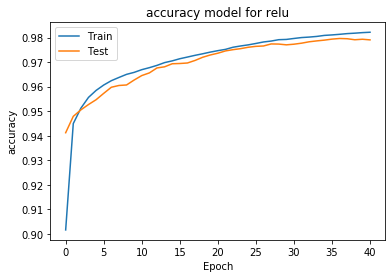

Combination 1 :  [20, 20, 20, 1]
Combination 2 :  [30, 30, 30, 1]
Combination 3 :  [40, 40, 40, 1]


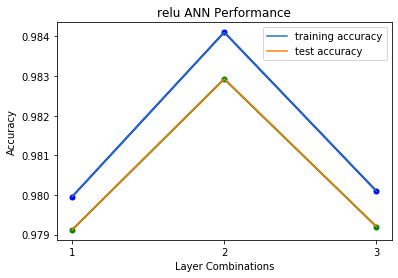

In [73]:
#Relu Activation with 3 layer combination
comb = [[20,20,20,1],[30,30,30,1],[40,40,40,1]]
model_act('relu', comb)

Fitting for ANN model with 4 layers and selu activation
Fitting for ANN model with 4 layers and tanh activation
Fitting for ANN model with 4 layers and relu activation


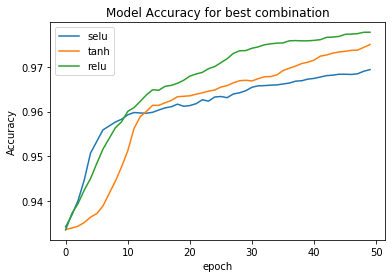

In [21]:
for activation in ['selu', 'tanh', 'relu']:
    train, val_train, test, val_test = train_test_split(x1_train, y1_train, test_size = 0.1, random_state = 0)

    np.random.seed(1337)
    model = Sequential()
    early_stopping_monitor = EarlyStopping(patience=3)
    model.add(Dense(30, input_dim=train.shape[1], activation=activation))
    model.add(Dense(30, activation=activation))
    model.add(Dense(30, activation=activation))
    #model.add(Dense(25, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
   
    # optimizer Gradient Descent
    sgd = optimizers.SGD(lr = 0.01)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    print("Fitting for ANN model with 4 layers and {} activation".format(activation))
    history = model.fit(train, test, epochs=50, batch_size=64, validation_data = (val_train, val_test), 
                        callbacks=[early_stopping_monitor],verbose = 0, shuffle = False)
    plt.plot(history.history['val_accuracy'])
    
plt.title('Model Accuracy for best combination')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['selu', 'tanh', 'relu'], loc='upper left')

Model Summary is 

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                450       
_________________________________________________________________
batch_normalization_4 (Batch (None, 30)                120       
_________________________________________________________________
dense_34 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_5 (Batch (None, 30)                120       
_________________________________________________________________
dense_35 (Dense)             (None, 30)                930       
_________________________________________________________________
batch_normalization_6 (Batch (None, 30)                120       
_________________________________________________________________
dense_36 (Dense)             (None,

173952/173952 [==============================] - 11s 61us/step - loss: 0.0580 - accuracy: 0.9761 - val_loss: 0.0417 - val_accuracy: 0.9833
Epoch 100/100
173952/173952 [==============================] - 7s 39us/step


Training Accuracy: 98.36


Test Accuracy: 98.25


Confusion Matrix : 
 [[11357   541]
 [  307 36115]]
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11898
           1       0.99      0.99      0.99     36422

    accuracy                           0.98     48320
   macro avg       0.98      0.97      0.98     48320
weighted avg       0.98      0.98      0.98     48320

AUC 0.9730506008188006


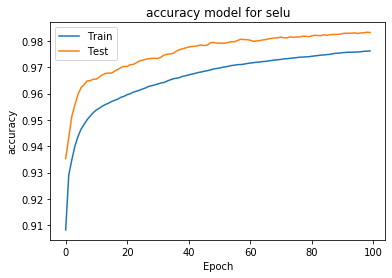

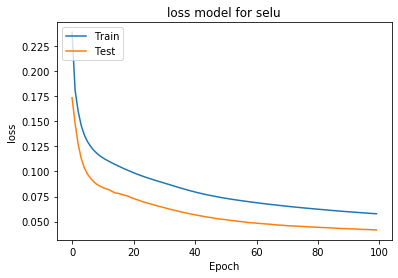

In [27]:
# Batch Normalization
cm,tr_ac,te_ac,history = ann_batch_normalization('selu',[30,30,30,1])

Model Summary is 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 30)                450       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_5 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_40 (Dense)             (None

Epoch 46/100
173952/173952 [==============================] - 9s 52us/step - loss: 0.1634 - accuracy: 0.9341 - val_loss: 0.1451 - val_accuracy: 0.9403
Epoch 47/100
173952/173952 [==============================] - 9s 52us/step - loss: 0.1634 - accuracy: 0.9340 - val_loss: 0.1446 - val_accuracy: 0.9400
Epoch 48/100
173952/173952 [==============================] - 9s 51us/step - loss: 0.1634 - accuracy: 0.9341 - val_loss: 0.1442 - val_accuracy: 0.9408
Epoch 49/100
173952/173952 [==============================] - 9s 53us/step - loss: 0.1634 - accuracy: 0.9339 - val_loss: 0.1439 - val_accuracy: 0.9406
Epoch 50/100
173952/173952 [==============================] - 9s 52us/step - loss: 0.1625 - accuracy: 0.9343 - val_loss: 0.1439 - val_accuracy: 0.9417
Epoch 51/100
173952/173952 [==============================] - 9s 52us/step - loss: 0.1622 - accuracy: 0.9344 - val_loss: 0.1434 - val_accuracy: 0.9411
Epoch 52/100
173952/173952 [==============================] - 9s 51us/step - loss: 0.1620 - ac

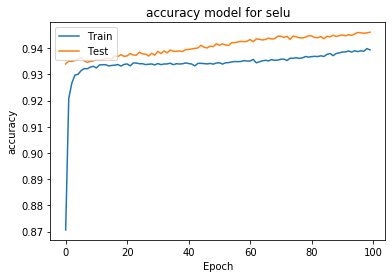

In [28]:
# Dropout Regularization
cm,tr_ac,te_ac,history = ann_dropout('selu',[30,30,30,1])

Model Summary is 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 30)                450       
_________________________________________________________________
dense_42 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_43 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 31        
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________
None
Fitting for ANN model using Adam Optimizer with 4 layers and selu activation
Train on 173952 samples, validate on 19328 samples
Epoch 1/100
173952/173952 [==============================] - 8s 43us/step - loss: 0.2508 - accura

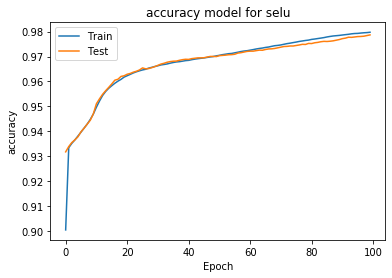

In [29]:
# adam_optimizer
cm,tr_ac,te_ac,history = ann_adam_optimizer('selu',[30,30,30,1])

# KNN

In [35]:
# optimal value of K for KNN
neighbors = list(range(1, 30, 2)) # range of k for neighbour experimentation

k_scores = list() # empty list to store scores

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k) #KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, x1_train, y1_train, cv=10, scoring='accuracy') # obtain cross_val_score
    k_scores.append(scores.mean())

#print(k_scores)

print('Max of validation score', max(k_scores))
print("Corresponding optimal number of neighbors is {}".format(neighbors[k_scores.index(max(k_scores))]))

plt.plot(neighbors, k_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-validated accuracy')
plt.title('Cross-validated Accuracy vs No of Neighbors')
plt.show()

Max of validation score 0.9393781043046359
Corresponding optimal number of neighbors is 5


In [36]:
#changing misclassification error
mse = [1 - x for x in k_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.title('Misclassification Error vs No of Neighbors')
plt.show()

The optimal number of neighbors is 5


In [37]:
neighbors = list(range(1,20,2))
train_results = list()
test_results = list()
train_accuracy = list()
test_accuracy = list()
for n in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(x1_train, y1_train)  
    train_pred = knn_model.predict(x1_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = knn_model.predict(x1_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    train_acc = knn_model.score(x1_train,y1_train)
    #print("Accuracy Metrics using {} neighbors for KNN classification".format(n))
    #print("Train set accuracy: {:.4f} \n \n".format(train_acc))
    #print('Test accuracy:', accuracy_score(y_pred,y_test2))
    #print(classification_report(y_test2, y_pred))
    train_accuracy.append(train_acc)
    test_accuracy.append(accuracy_score(y_pred,y1_test))
    

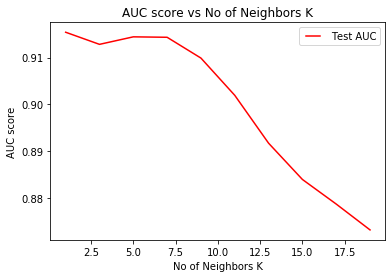

In [38]:
line2, = plt.plot(neighbors, test_results, 'r',label="Test AUC")
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('No of Neighbors K')
plt.title('AUC score vs No of Neighbors K')
plt.show()

In [39]:
line3, = plt.plot(neighbors, train_accuracy,'b', label="Train Accuracy")
line4, = plt.plot(neighbors, test_accuracy, 'r',label="Test Accurcy")
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy metrics')
plt.xlabel('No of Neighbors K')
plt.title('AUC score vs No of Neighbors')
plt.show()

In [40]:
distances = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']
train_results = list()
test_results = list()
train_accuracy = list()
test_accuracy = list()

#loop for including multiple distances
for p in distances:
    knn_model = KNeighborsClassifier(n_neighbors = 5, metric=p, n_jobs = 4)
    knn_model.fit(x1_train, y1_train)  
    train_pred = knn_model.predict(x1_train)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)   
    y_pred = knn_model.predict(x1_test)   
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y1_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    
    train_acc = knn_model.score(x1_train,y1_train)
    print("Accuracy Metrics using {} distance for KNN classification".format(p))
    print("Train set accuracy: {:.4f} \n \n".format(train_acc))
    print('Test accuracy:', accuracy_score(y_pred,y1_test))
    print(classification_report(y1_test, y_pred))
    train_accuracy.append(train_acc)
    test_accuracy.append(accuracy_score(y_pred,y1_test))
    

Accuracy Metrics using minkowski distance for KNN classification
Train set accuracy: 0.9674 
 

Test accuracy: 0.9411216887417219
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     11898
           1       0.96      0.97      0.96     36422

    accuracy                           0.94     48320
   macro avg       0.93      0.91      0.92     48320
weighted avg       0.94      0.94      0.94     48320

Accuracy Metrics using euclidean distance for KNN classification
Train set accuracy: 0.9674 
 

Test accuracy: 0.9411216887417219
              precision    recall  f1-score   support

           0       0.90      0.86      0.88     11898
           1       0.96      0.97      0.96     36422

    accuracy                           0.94     48320
   macro avg       0.93      0.91      0.92     48320
weighted avg       0.94      0.94      0.94     48320

Accuracy Metrics using manhattan distance for KNN classification
Train set accuracy: 0

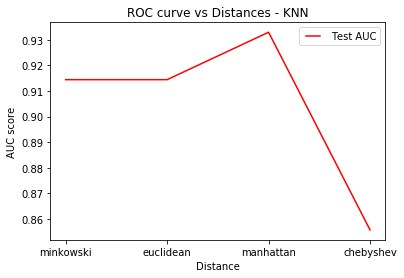

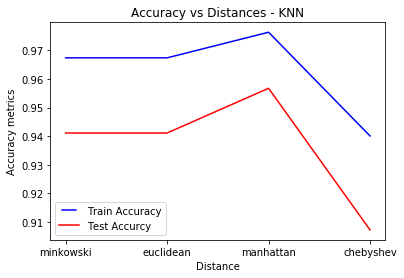

In [41]:
#line1, = plt.plot(distances, train_results,'b', label="Train AUC")
line2, = plt.plot(distances, test_results, 'r',label="Test AUC")
plt.legend(handler_map={line2: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Distance')
plt.title('ROC curve vs Distances - KNN')
plt.show()

line3, = plt.plot(distances, train_accuracy,'b', label="Train Accuracy")
line4, = plt.plot(distances, test_accuracy, 'r',label="Test Accurcy")
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy metrics')
plt.xlabel('Distance')
plt.title('Accuracy vs Distances - KNN')
plt.show()

In [23]:
k_range = list(range(1, 10, 2))
knn = KNeighborsClassifier()
#weight_options = ['uniform','distance'] # Distance weighs closer neighbors more heavily than further neighbors
distances = ['minkowski', 'euclidean', 'manhattan', 'chebyshev']

param_grid = dict(n_neighbors=k_range, metric = distances, n_jobs=[4])#, weights=weight_options, n_jobs = 4)

grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(x1_train, y1_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=29, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan',
                                    'chebyshev'],
                         'n_jobs': [4], 'n_neighbors': [1, 3, 5, 7, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [24]:
# Best model
print(grid.best_score_)
print(grid.best_params_)

0.9420167661864935
{'metric': 'manhattan', 'n_jobs': 4, 'n_neighbors': 5}


In [25]:
# instantiate model with best parameters
knn_best = KNeighborsClassifier(n_neighbors=5, metric = 'manhattan', n_jobs = 4)

In [26]:
knn_best.fit(x1_train, y1_train)
train_acc_best = knn_best.score(x1_train,y1_train)
print("Train set accuracy: {:.3f}".format(train_acc_best))
y_pred = knn_best.predict(x1_test)

print('Test accuracy:', accuracy_score(y_pred,y1_test))
print(classification_report(y1_test, y_pred)) 
print("AUC",roc_auc_score(y1_test, y_pred))

Train set accuracy: 0.976
Test accuracy: 0.9567466887417219
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     11898
           1       0.96      0.98      0.97     36422

    accuracy                           0.96     48320
   macro avg       0.95      0.93      0.94     48320
weighted avg       0.96      0.96      0.96     48320

AUC 0.9329958971909925


roc_auc_score for KNN:  0.9329958971909925


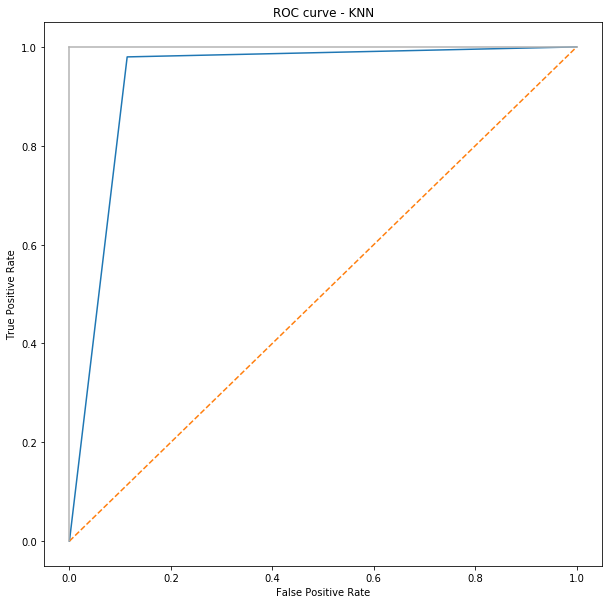

In [27]:
fpr_best, tpr_best, threshold_best = roc_curve(y1_test, y_pred)
print('roc_auc_score for KNN: ', roc_auc_score(y1_test, y_pred))

plt.subplots(1, figsize=(10,10))
plt.title('ROC curve - KNN')
plt.plot(fpr_best, tpr_best)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()